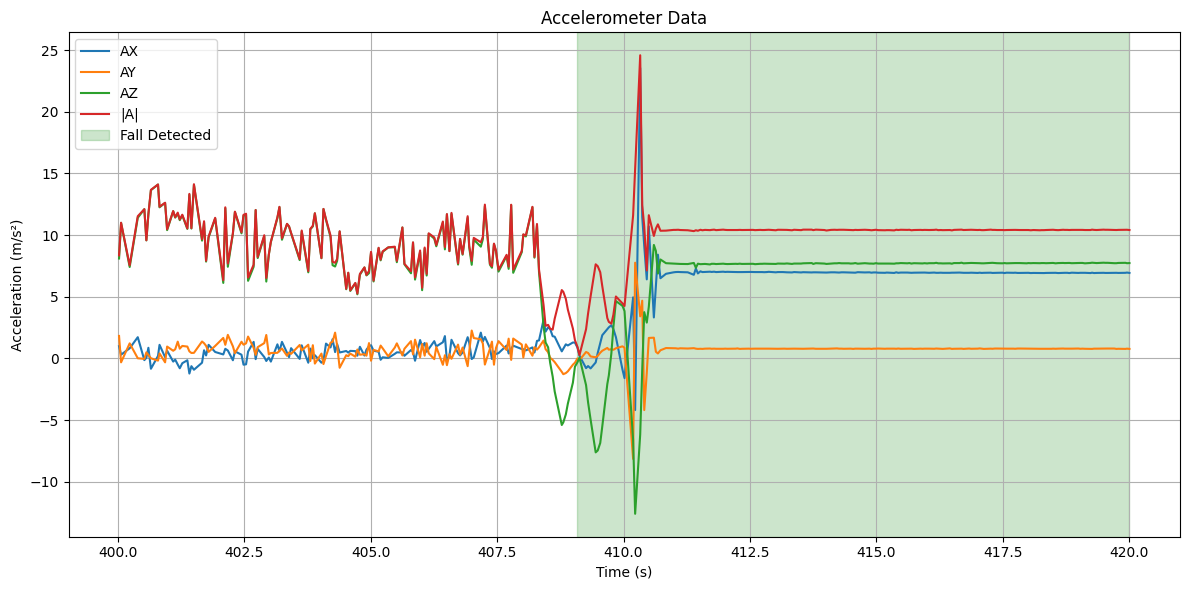

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('drop-test-data/drone-mar-21-test-with-fall-detected.csv')  # Replace with your actual file name

# Filter to Time between 400 and 420
df = df[(df['Time'] >= 400) & (df['Time'] <= 420)].reset_index(drop=True)

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['AX'], label='AX', linewidth=1.5)
plt.plot(df['Time'], df['AY'], label='AY', linewidth=1.5)
plt.plot(df['Time'], df['AZ'], label='AZ', linewidth=1.5)
plt.plot(df['Time'], df['|A|'], label='|A|', linewidth=1.5)

# Fill background where FallDetected == 1
in_fall = False
start_time = None

for i in range(len(df)):
    if df.loc[i, 'FallDetected'] == 1 and not in_fall:
        in_fall = True
        start_time = df.loc[i, 'Time']
    elif df.loc[i, 'FallDetected'] == 0 and in_fall:
        end_time = df.loc[i, 'Time']
        plt.axvspan(start_time, end_time, color='green', alpha=0.2, label='Fall Detected')
        in_fall = False

# Handle if the file ends while a fall is active
if in_fall:
    plt.axvspan(start_time, df.loc[len(df)-1, 'Time'], color='green', alpha=0.2, label='Fall Detected')

# Clean up legend duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys())

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Accelerometer Data')
plt.grid(True)
plt.tight_layout()
plt.show()
